In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

In [22]:
image_height = 400
image_width = 600
dpi = 100

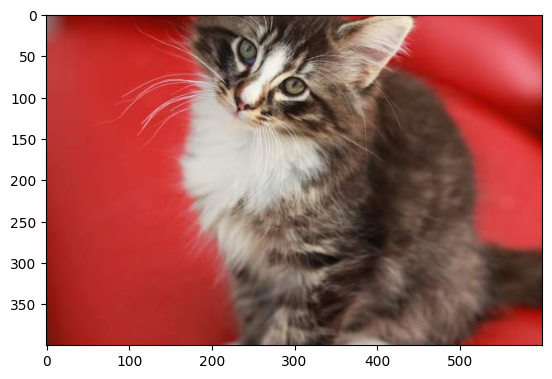

In [23]:
url = f"https://placekitten.com/{image_width}/{image_height}"
img = io.imread(url)
plt.imshow(img)

(<Axes: title={'center': 'Canny'}>,
 Text(0.5, 1.0, 'Canny'))

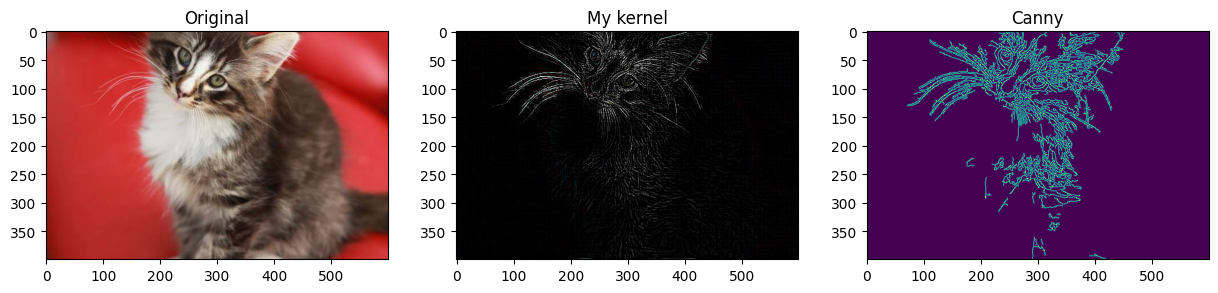

In [128]:
kernel_size = 3
kernel = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])
color_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color_image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
result = cv2.filter2D(img, -1, kernel)
result_canny = cv2.Canny(img, 50, 200)
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(result), plt.title('My kernel')
plt.subplot(133), plt.imshow(result_canny), plt.title('Canny')

# Задание для новеньких

Создайте свой собственный фильтр через инициализацию матрицу в numpy и примените его к изображению с помощью функции `cv2.filter2D`. Этот фильтр не должен копировать матрицу, представленные в стандартных функциях библиотеки opencv. Экспериментируйте, попробуйте добиться какого-то определенного эффекта или объясните полученный в результате поиска собственной матрицы.

Требования к заданию:
1. матрица не повторяет фильтр, представленные на занятии
2. вы продемонстрировали результат применения собственного фильтра в сравнении с реализованным в open cv
3. вы можете объяснить, какого эффекта добились и почему

Критерии оценки:
* оценка 3: выполнен пункт 1
* оценка 4: выполнены пункты 1-2
* оценка 5: выполнены пункты 1-3

# Задание для смешариков

Напишите алгоритм выделения границ контрастного объекта на изображении с использованием цветовой гистограммы и порога.

Сегментация изображения:
1. Переведите изображение в цветовое пространство HSV
2. Проанализируйте гистограмму изображения и выберите min, max пороговое значение, чтобы сегментировать контрастный объект.
3. Внедрите применение порога обработку, чтобы сегментировать контрастный объект.
4. Реализуйте обнаружение границ с помощью фильтра Кэнни. Примените фильтр Гаусса перед обнаружением границ. Оцените результат
5. Приметие алгортим выделения границ с помощью вычетания: взять изображение, размыть его Гауссом с большой апертурой, например, 49, а потом вычесть
получившееся изображение из исходного. Должны выделится границы. Сравните с Canny.
6. Примените полученные алгорим к реальному видео с камеры. Проверьте его на реальном объекте

Критерии оценки:   
3 реализованы пункты 1-4   
4 реализованы пункты 1-5  
5 реализованы пункты 1-6   

2. Проанализируйте гистограмму изображения и выберите min, max пороговое значение, чтобы сегментировать контрастный объект:

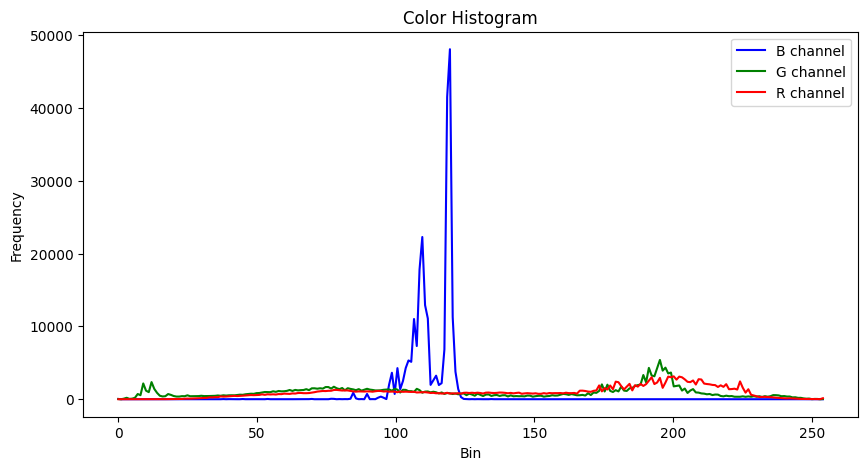

In [142]:
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
plt.title('Color Histogram')
plt.xlabel('Bin')
plt.ylabel('Frequency')

for i, col in enumerate(colors):
    histogram, bin_edges = np.histogram(
        hsv[:, :, i], bins=256, range=(0, 255)
    )
    plt.plot(bin_edges[0:-1], histogram, color=col, label=f'{col.upper()} channel')

plt.legend()
plt.show()

3. Внедрите применение порога обработку, чтобы сегментировать контрастный объект:

(<Axes: title={'center': 'Gray'}>,
 Text(0.5, 1.0, 'Gray'))

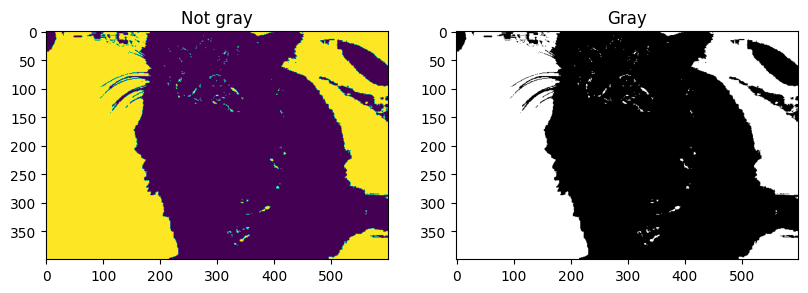

In [154]:
mask = cv2.inRange(hsv, (0,160,0), (255, 240, 255))
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(mask), plt.title('Not gray')
plt.subplot(132), plt.imshow(mask, cmap="gray"), plt.title('Gray')

4. Реализуйте обнаружение границ с помощью фильтра Кэнни. Примените фильтр Гаусса перед обнаружением границ. Оцените результат

(<Axes: title={'center': 'Gauss'}>,
 Text(0.5, 1.0, 'Gauss'))

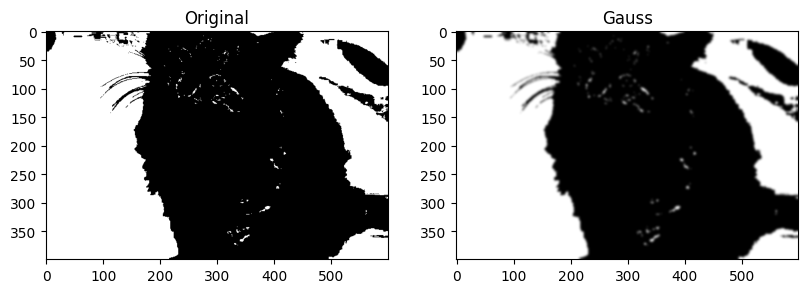

In [191]:
mask_gauss = cv2.GaussianBlur(mask, ksize=(11, 11), sigmaX=0, sigmaY=0)
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(mask, cmap="gray"), plt.title('Original')
plt.subplot(132), plt.imshow(mask_gauss, cmap="gray"), plt.title('Gauss')

(<Axes: title={'center': 'Canny'}>,
 Text(0.5, 1.0, 'Canny'))

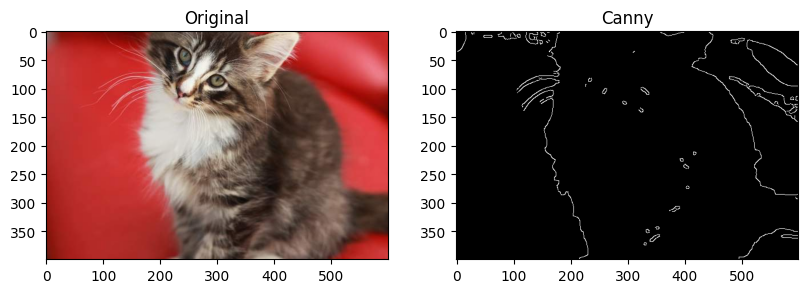

In [204]:
lower_threshold = 170
upper_threshold = 220
edges = cv2.Canny(mask_gauss, lower_threshold, upper_threshold)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title('Canny')

5. Приметие алгортим выделения границ с помощью вычетания: взять изображение, размыть его Гауссом с большой апертурой, например, 49, а потом вычесть получившееся изображение из исходного. Должны выделится границы. Сравните с Canny.

(<Axes: title={'center': 'Result'}>,
 Text(0.5, 1.0, 'Result'))

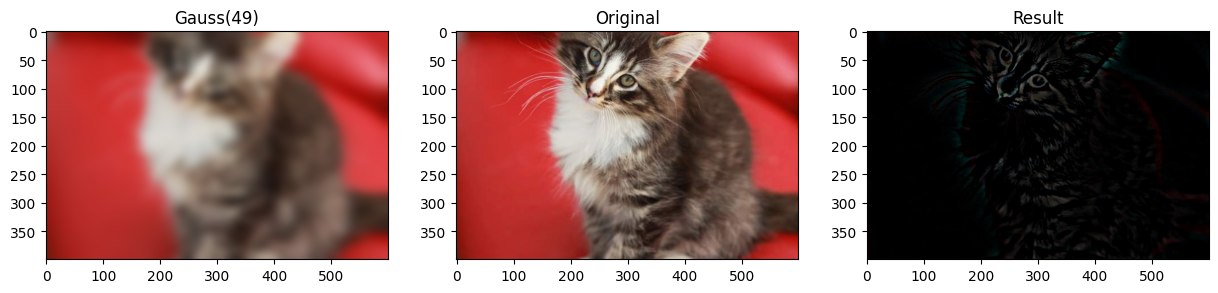

In [206]:
img_gauss_49 = cv2.GaussianBlur(img, ksize=(49, 49), sigmaX=0, sigmaY=0)
result_subtraction = cv2.subtract(img_gauss_49, img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img_gauss_49), plt.title('Gauss(49)')
plt.subplot(132), plt.imshow(img), plt.title('Original')
plt.subplot(133), plt.imshow(result_subtraction, cmap='gray'), plt.title('Result')

6. Примените полученные алгорим к реальному видео с камеры. Проверьте его на реальном объекте

Так и не смог заставить коллаб включить трансляцию с камеры, поэтому сделал в обычной IDE